# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

In [2]:
pk=pd.read_csv('PoliceKillingsUS.csv', encoding='windows-1252')
pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

## 1: Plot number of people by gender

In [3]:
pk.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True
2534,2815,Dwayne Jeune,31/07/17,shot,knife,32.0,M,B,Brooklyn,NY,True,attack,Not fleeing,False


In [260]:
Gender = pd.DataFrame(pk['gender'].value_counts())
Gender

,gender
M,2428
F,107


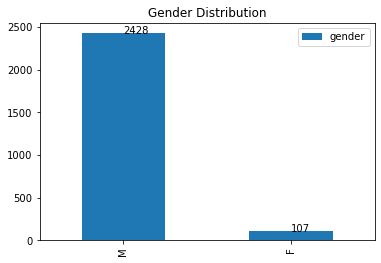

In [261]:
Gender.plot(kind='bar', title='Gender Distribution')

for index, value in enumerate(Gender.gender): 
    plt.text(index, value, str(value))
    
plt.show()

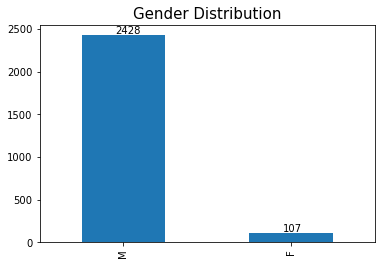

In [262]:
# object oriented method
fig, ax = plt.subplots()

pk.gender.value_counts().plot(kind='bar', ax=ax)

ax.set_title('Gender Distribution', fontsize = 15)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+20))
    
plt.show()

In [242]:
ax.patches

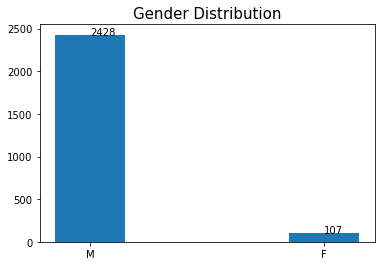

In [263]:
plt.bar(Gender.index, Gender.gender, width=0.3)
plt.title('Gender Distribution', fontsize=15)

for index, value in enumerate(Gender.gender): 
    plt.text(index, value, str(value))

plt.show()

## 2: Plot 7 most common kill weapons

In [264]:
pk.armed.value_counts().head(7)

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [265]:
common_kill = pd.DataFrame(pk.armed.value_counts().head(7))
common_kill

,armed
gun,1398
knife,373
vehicle,177
unarmed,171
undetermined,117
toy weapon,104
machete,18


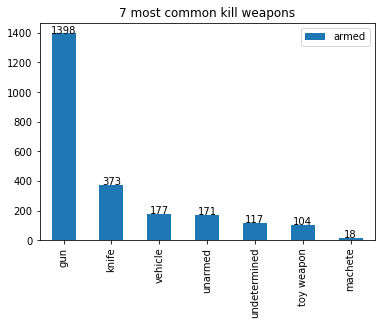

In [266]:
# with pandas
common_kill.plot.bar(title = '7 most common kill weapons')

for index, value in enumerate(common_kill.armed): 
    plt.text(index, value, str(value), ha='center')
    
plt.show()

#Another solution :
#common_weapons = pd.DataFrame(pk.armed.value_counts().head(7))
#fig, ax = plt.subplots(figsize=(8,5))
#common_weapons.plot(kind='bar',ax=ax)
#ax.set_xticklabels(common_weapons.index, rotation=45)
#for p in ax.patches:
#    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10));

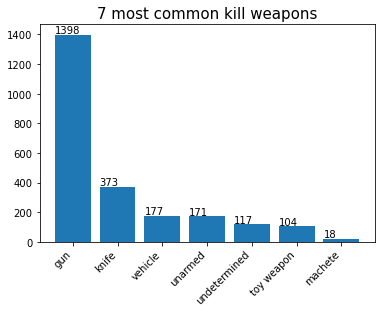

In [267]:
# with matplotlib
bars = plt.bar(common_kill.index, common_kill.armed)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + 10, yval, ha='left')

plt.xticks(rotation=45, ha='right')

plt.title('7 most common kill weapons', fontsize=15)
plt.show()

#Another solution :
#common_weapons = pd.DataFrame(pk.armed.value_counts().head(7))
#fig, ax = plt.subplots(figsize=(8,5))
#ax.bar(x = common_weapons.index, height=common_weapons.values)
#ax.set_xticklabels(common_weapons.index, rotation=45)
#for p in ax.patches:
#    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10));

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [5]:
pk['age_cat'] = pk['age'].apply(lambda x: 'above25' if x>25 else ('below25' if x<=25 else 'others'))
pk.age_cat.head()

0    above25
1    above25
2    below25
3    above25
4    above25
Name: age_cat, dtype: object

In [269]:
pk.age_cat.value_counts()

above25    1905
below25     553
others       77
Name: age_cat, dtype: int64

In [270]:
age_cat = pd.DataFrame(pk.age_cat.value_counts())
age_cat

,age_cat
above25,1905
below25,553
others,77


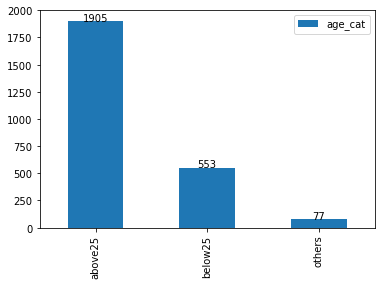

In [271]:
age_cat.plot(kind='bar')

for index, value in enumerate(age_cat.age_cat): 
    plt.text(index, value, str(value), ha='center')

plt.show()

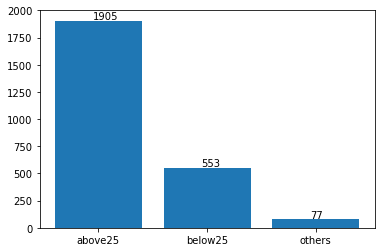

In [272]:
# with matplotlib
age_cat = pk.age_cat.value_counts()
fig, ax = plt.subplots()
ax.bar(x = age_cat.index, height= age_cat.values)

for p in ax.patches:
    ax.annotate(round(p.get_height()), (p.get_x()+0.35, p.get_height()+10));
    
plt.show()

## 4: Plot number of killed poeple by race

In [273]:
pk.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

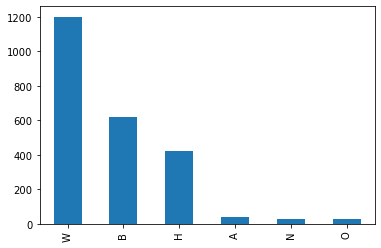

In [274]:
pk.race.value_counts().plot.bar()
plt.show()

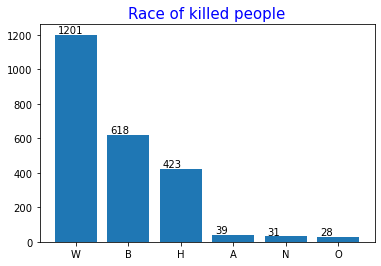

In [275]:
race = pk.race.value_counts()

fig, ax = plt.subplots()

ax.bar(x=race.index, height=race.values)
ax.set_title('Race of killed people',color = 'blue',fontsize=15);

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+10));

## 5: Killed People According to Races (Pie Chart)

In [276]:
pk.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [277]:
pk.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [278]:
pk.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [279]:
pk.race.isnull().sum()

195

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [280]:
pk.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [3]:
pk.dropna(subset=['race'], inplace=True)
pk.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
pk.shape

(2340, 15)

In [283]:
pk.race.value_counts(dropna=False)

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [284]:
race = pk.race.value_counts()
race

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [285]:
race.index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [286]:
race.values

array([1201,  618,  423,   39,   31,   28])

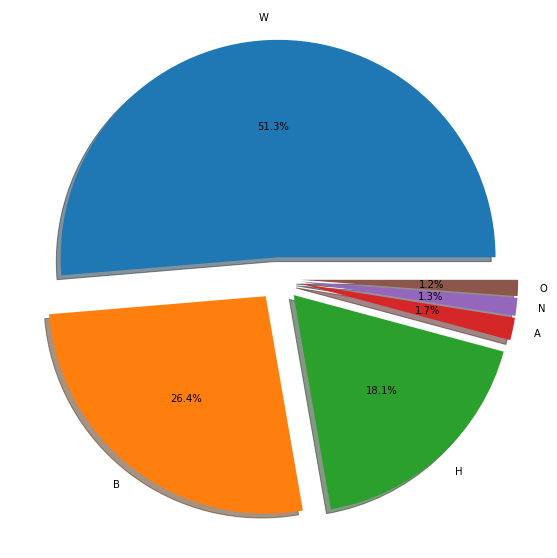

In [287]:
plt.figure(figsize=(15,10))

plt.pie(race.values, labels=race.index, autopct='%1.1f%%',explode = [0.1 , 0.1 , 0.1 , 0.1, 0.1, 0.1], shadow=True)

plt.show()

## 6: Most common 15 Name or Surname of killed people 

In [288]:
pk.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [289]:
pk.shape

(2340, 15)

In [290]:
pk.name.value_counts()

TK TK                       5
Daquan Antonio Westbrook    2
Brandon Jones               2
Eric Harris                 2
Michael Johnson             2
                           ..
Floyd Ray Cook              1
John Charles "JC" Graham    1
Jesus Alberto Geney         1
Jeffrey Kemp                1
Jasen Scott Ramirez         1
Name: name, Length: 2331, dtype: int64

In [7]:
pk.name.isnull().sum()

0

In [8]:
pk = pk[pk.name != 'TK TK']

In [9]:
pk.name.value_counts()

Michael Brown               2
Daquan Antonio Westbrook    2
Brandon Jones               2
Michael Johnson             2
Eric Harris                 2
                           ..
Bruce Steward               1
James Smillie               1
Eduardo Hernandez           1
Robert Lee Brown            1
Marion Lee Holliday         1
Name: name, Length: 2330, dtype: int64

In [11]:
pk.shape

(2335, 15)

In [14]:
names = pk.name.str.split(' ')

In [15]:
names

0                [Tim, Elliot]
1         [Lewis, Lee, Lembke]
2       [John, Paul, Quintero]
3           [Matthew, Hoffman]
4         [Michael, Rodriguez]
                 ...          
2523     [Kesharn, K., Burney]
2525       [Deltra, Henderson]
2528     [Alejandro, Alvarado]
2533          [Isaiah, Tucker]
2534           [Dwayne, Jeune]
Name: name, Length: 2335, dtype: object

In [17]:
a,b = zip(*names)
name_list = a+b
name_list

('Tim',
 'Lewis',
 'John',
 'Matthew',
 'Michael',
 'Kenneth',
 'Kenneth',
 'Brock',
 'Autumn',
 'Leslie',
 'Patrick',
 'Ron',
 'Hashim',
 'Nicholas',
 'Omarr',
 'Loren',
 'James',
 'Artago',
 'Thomas',
 'Jimmy',
 'Andy',
 'Tommy',
 'Brian',
 'Salvador',
 'John',
 'Richard',
 'Marcus',
 'Michael',
 'Mario',
 'Talbot',
 'Robert',
 'Jeffrey',
 'Donte',
 'Kavonda',
 'Quincy',
 'Jose',
 'Nathan',
 'Scott',
 'Zaki',
 'Terence',
 'Pablo',
 'Daniel',
 'Jonathan',
 'Carter',
 'Paul',
 'Dewayne',
 'Todd',
 'Miguel',
 'Isaac',
 'Andrew',
 'Tiano',
 'Kristiana',
 'Robert',
 'Demaris',
 'Jose',
 'Wendell',
 'Daryl',
 'Darin',
 'Orlando',
 'Jessie',
 'Raymond',
 'Joshua',
 'David',
 'Nicolas',
 'Chris',
 'Jermonte',
 'Tiffany',
 'Alan',
 'Matautu',
 'Cody',
 'Ralph',
 'Alan',
 'John',
 'Victor',
 'Edward',
 'Jacob',
 'David',
 'Francis',
 'Ledarius',
 'Yuvette',
 'Dewayne',
 'Anthony',
 'Jeremy',
 'Izzy',
 'Salvador',
 'Joaquin',
 'Jimmy',
 'Markell',
 'Paul',
 'Herbert',
 'John',
 'James',
 'John'

In [27]:
name_count = Counter(name_list)         
most_common_names = name_count.most_common(15)
most_common_names

[('Michael', 83),
 ('David', 54),
 ('James', 49),
 ('Robert', 44),
 ('Joseph', 43),
 ('William', 42),
 ('Daniel', 41),
 ('John', 37),
 ('Christopher', 37),
 ('Lee', 36),
 ('Richard', 33),
 ('', 33),
 ('J.', 30),
 ('Joshua', 28),
 ('Jose', 26)]

In [28]:
# we need to get rid of empty names (' ')
type(name_list)

tuple

In [25]:
name_list2=list(name_list)

In [29]:
type(name_list2)

list

In [42]:
name_list2.count('')

30

In [46]:
name_list2.remove('')
name_list2[:] = (value for value in name_list2 if value != '')

In [47]:
name_list2.count('')

0

In [48]:
name_count = Counter(name_list2)         
most_common_names = name_count.most_common(15)
most_common_names

[('Michael', 83),
 ('David', 54),
 ('James', 49),
 ('Robert', 44),
 ('Joseph', 43),
 ('William', 42),
 ('Daniel', 41),
 ('John', 37),
 ('Christopher', 37),
 ('Lee', 36),
 ('Richard', 33),
 ('J.', 30),
 ('Joshua', 28),
 ('Jose', 26),
 ('Anthony', 26)]

In [23]:
type(name_count)

collections.Counter

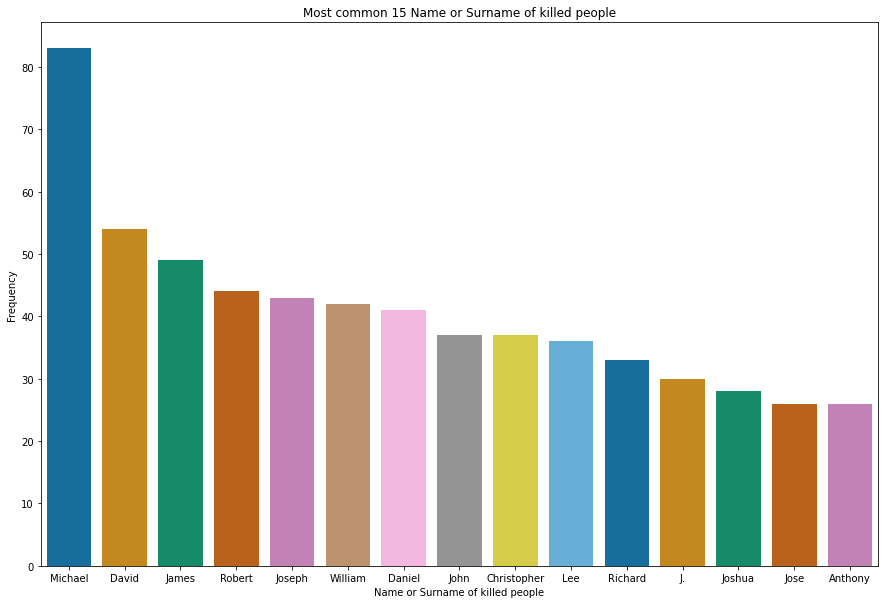

In [61]:
x,y = zip(*most_common_names)
x,y = list(x),list(y)

plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y, palette = 'colorblind')

plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

plt.show()

**INSTRUCTION : Plot Most common 15 Name OR Surname of killed people** 

shape